## Libraries Install

In [1]:
!pip install pandas_profiling
!pip install category_encoders

## Libraries import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# encoders
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve

# pipeline
from sklearn.pipeline import make_pipeline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosted Models
from xgboost import XGBClassifier

# profile Report
from pandas_profiling import ProfileReport

# Permutation Importance
from sklearn.inspection import permutation_importance


In [3]:
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 75)

## Wrangle the data

In [4]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    return df

In [5]:
df=wrangle('Dry_Bean_Dataset.csv')

In [6]:
print(df.shape)
df.head()

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
Report = ProfileReport(df, minimal=True).to_notebook_iframe()

Report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Visualization

<ipython-input-9-44734e45ad33>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


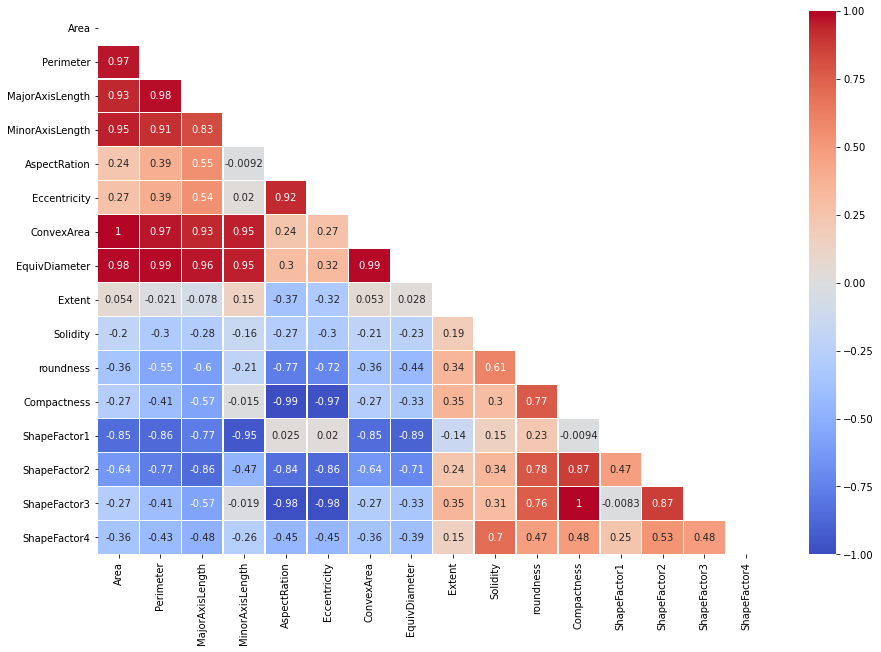

In [9]:
# using heatmap to find if ther is a high correlation betwen the feature 
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(15,10))
sns.heatmap(df_corr ,mask=mask, linewidth =0.5,vmin=-1, vmax=1, annot=True, cmap = 'coolwarm' )
plt.show()

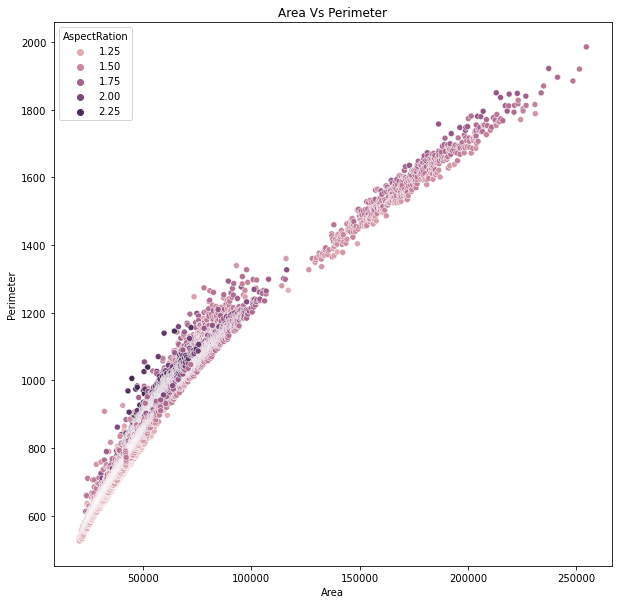

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Area', y='Perimeter', hue='AspectRation',data=df)
plt.title('Area Vs Perimeter')
plt.show()

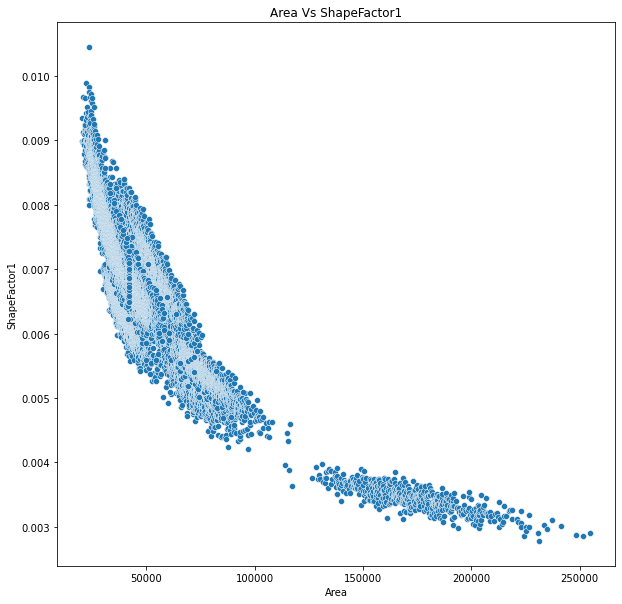

In [11]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Area', y='ShapeFactor1',data=df)
plt.title('Area Vs ShapeFactor1')
plt.show()

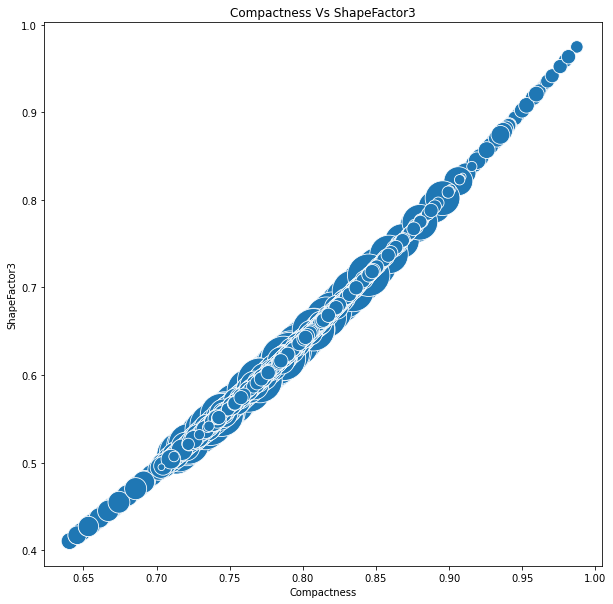

In [12]:
# bubble scatter
plt.figure(figsize=(10,10))
sns.scatterplot(x='Compactness', y='ShapeFactor3',size='Area',data=df, legend=False, sizes=(20, 2000))
plt.title('Compactness Vs ShapeFactor3')

plt.show()

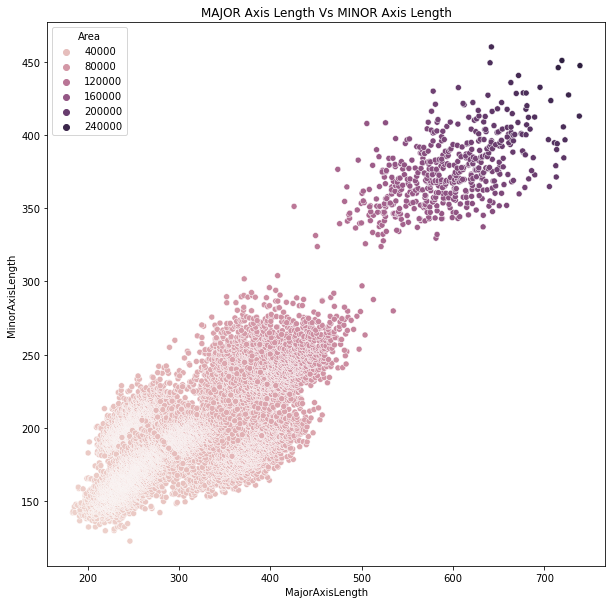

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='MajorAxisLength', y='MinorAxisLength',hue=('Area'),data=df)
plt.title('MAJOR Axis Length Vs MINOR Axis Length')
plt.show()

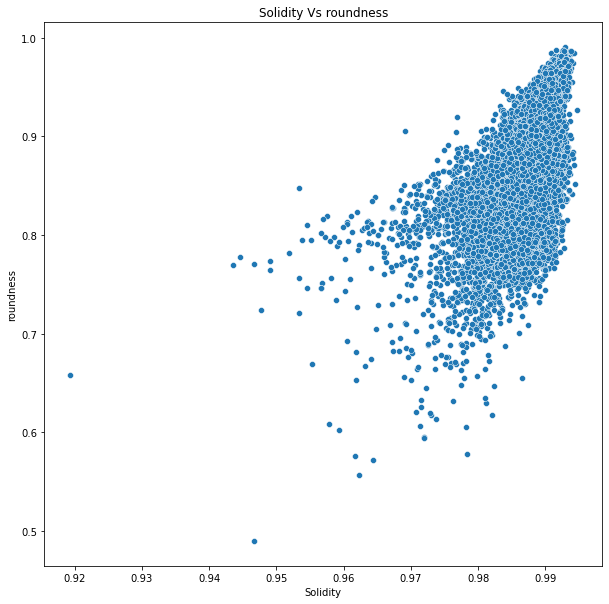

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Solidity', y='roundness',data=df)
plt.title('Solidity Vs roundness')
plt.show()

C:\Users\mosae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


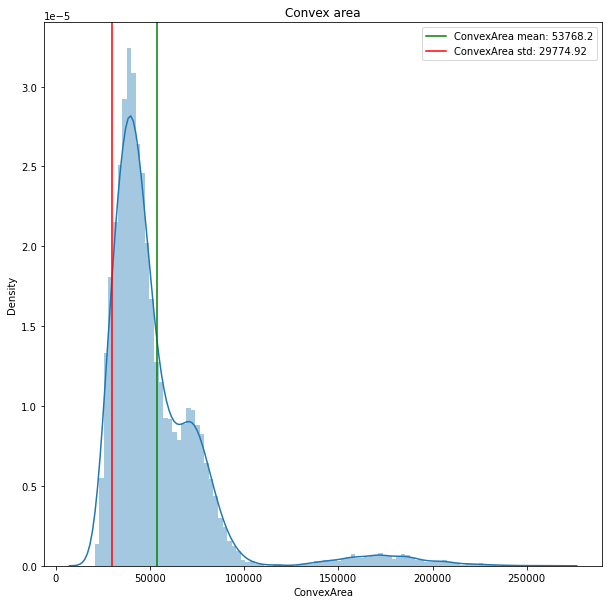

In [15]:
plt.figure(figsize=(10,10))
sns.distplot(df['ConvexArea'],bins=100)
ConvexArea_mean = df['ConvexArea'].mean()
ConvexArea_std = df['ConvexArea'].std()
plt.axvline(x=ConvexArea_mean,color='green',label=f'ConvexArea mean: {round(ConvexArea_mean,2)}')
plt.axvline(x=ConvexArea_std,color='red',label=f'ConvexArea std: {round(ConvexArea_std,2)}')
plt.legend()
plt.title('Convex area')
plt.show()

C:\Users\mosae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


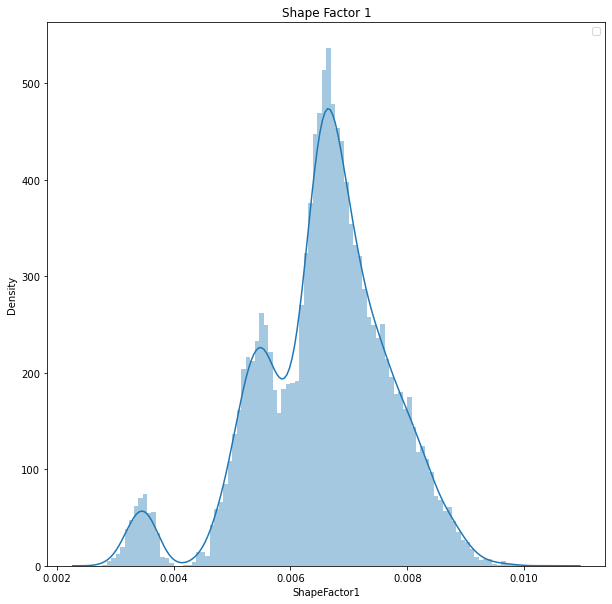

In [16]:
plt.figure(figsize=(10,10))
sns.distplot(df['ShapeFactor1'],bins=100)
plt.legend()
plt.title('Shape Factor 1')
plt.show()

C:\Users\mosae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mosae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mosae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

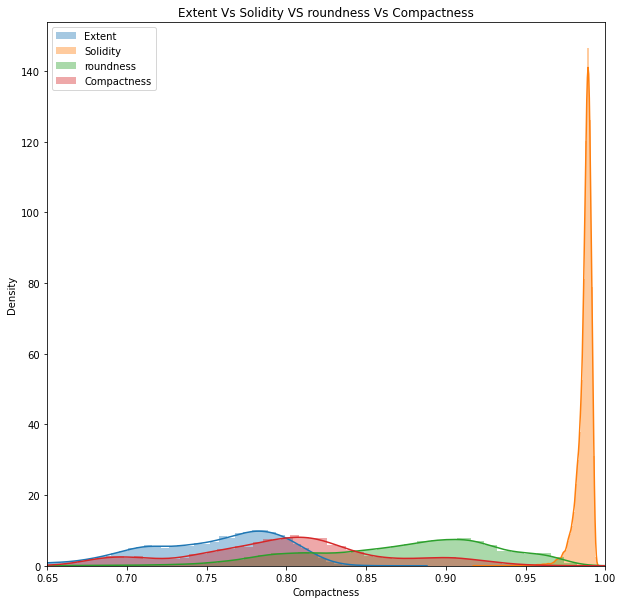

In [17]:
plt.figure(figsize=(10,10))
sns.distplot(df['Extent'],bins=60, label='Extent')
sns.distplot(df['Solidity'],bins=60, label='Solidity')
sns.distplot(df['roundness'],bins=60, label='roundness')
sns.distplot(df['Compactness'],bins=60, label='Compactness')
plt.legend()
plt.xlim(0.65, 1)
plt.title('Extent Vs Solidity VS roundness Vs Compactness')
plt.show()

## Is your problem regression or classification?

my problem is a classification problem

## My Target Columns

In [18]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

## Target column destripuation.

In [19]:
df['Class'].value_counts(normalize=True)

DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: Class, dtype: float64

## Split

In [20]:
df = df.sample(frac=1) # randimizing the dataset

In [21]:
X= df.drop(columns=['Class'])  # the data materixs 
y = df['Class'] # target columns

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state=42)

print(f'X_train shape {X_train.shape} ----> y_train shape  {y_train.shape} \nX_val shape {X_val.shape} ----> y_val shape  {y_val.shape}')

X_train shape (11569, 16) ----> y_train shape  (11569,) 
X_val shape (2042, 16) ----> y_val shape  (2042,)


# Establish Baseline

In [23]:
print(' the baseline accuracy score is ', round(y_train.value_counts(normalize=True).max(),4)*100)

 the baseline accuracy score is  25.71


# Logistic regression Model

In [24]:
model_rl = make_pipeline(OneHotEncoder(use_cat_names=True),
                         StandardScaler(),
                         SimpleImputer(strategy='mean'),
                         LogisticRegression(solver='liblinear')
                        )

model_rl.fit(X_train, y_train)

C:\Users\mosae\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state

In [25]:
print('Random Forests train accuracy', model_rl.score(X_train, y_train))
print('Random Forests test accuracy', model_rl.score(X_val, y_val))

Random Forests train accuracy 0.9184890656063618
Random Forests test accuracy 0.9123408423114594


In [26]:
cv_score_model_rl = cross_val_score(model_rl,
                                   X,
                                   y,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-2)

print(f'the logestic regression model accuracy mean score is {round(cv_score_model_rl.mean()*100,2)}%')

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.


the logestic regression model accuracy mean score is 91.67%


[Parallel(n_jobs=-2)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    3.7s finished


## Permutation Importance

In [27]:
perm_imp = permutation_importance(model_rl, X_val, y_val, n_jobs=-2, random_state=42)

In [28]:
data = {'imp_mean': perm_imp['importances_mean'],
        'imp_std': perm_imp['importances_std']}

importances = pd.DataFrame(data, index=X_val.columns).sort_values(by='imp_mean')

importances.head(16)

,imp_mean,imp_std
Extent,0.000686,0.001142
Solidity,0.003428,0.003097
Compactness,0.023506,0.005117
EquivDiameter,0.026934,0.002535
ShapeFactor3,0.036729,0.004646
ShapeFactor4,0.039079,0.002199
MinorAxisLength,0.061312,0.005168
roundness,0.089324,0.002431
Area,0.096082,0.003537
ConvexArea,0.100881,0.003930


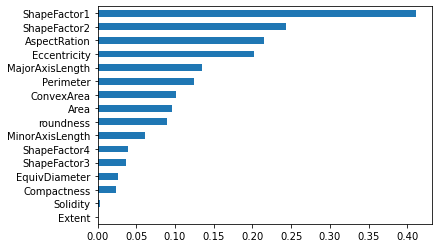

In [29]:
importances['imp_mean'].tail(17).plot(kind='barh')
plt.show()

## Precision, Recall, F1

In [30]:
print(classification_report(y_val, model_rl.predict(X_val)))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.88      0.90       180
      BOMBAY       1.00      1.00      1.00        81
        CALI       0.94      0.94      0.94       266
    DERMASON       0.94      0.88      0.91       572
       HOROZ       0.95      0.94      0.95       280
       SEKER       0.95      0.95      0.95       276
        SIRA       0.79      0.89      0.84       387

    accuracy                           0.91      2042
   macro avg       0.93      0.93      0.93      2042
weighted avg       0.92      0.91      0.91      2042



## confusion matrix

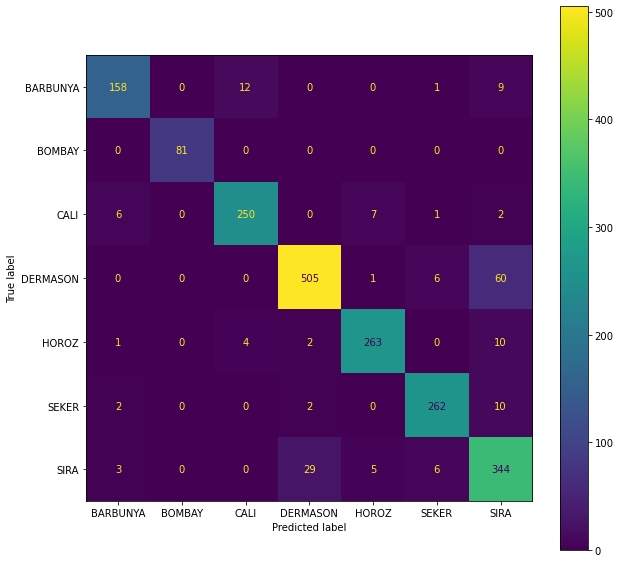

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model_rl,
                      X_val,
                      y_val,
                      values_format = '.0f',
                      ax=ax)
plt.show()

# Random Forests Model


In [32]:
model_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy= 'mean'),
    RandomForestClassifier(max_depth=25,
                           n_estimators=120)
)

model_rf.fit(X_train, y_train)

C:\Users\mosae\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifi...=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=25, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                             

In [33]:
print('Random Forests train accuracy', model_rf.score(X_train, y_train))
print('Random Forests test accuracy', model_rf.score(X_val, y_val))

Random Forests train accuracy 1.0
Random Forests test accuracy 0.9294809010773751


### Cross-valadaiton

In [34]:
cv_score_model_rf = cross_val_score(model_rf,
                                   X,
                                   y,
                                   cv=5,
                                    verbose=2,
                                   n_jobs=-2)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.1s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    4.2s finished


In [35]:
print(f'the Decision Trees model accuracy mean score is {round(cv_score_model_rf.mean()*100,2)}%')

the Decision Trees model accuracy mean score is 92.44%


## Model Tuning

In [36]:
pramas_grid={
    "randomforestclassifier__max_depth": np.arange(15,26,1) ,
    "randomforestclassifier__n_estimators": np.arange(100,180,10) ,
    'randomforestclassifier__min_samples_leaf':[2],
}

In [37]:
model_rf_tune = GridSearchCV(model_rf, 
                             param_grid=pramas_grid, 
                             n_jobs=-2, 
                             cv=3, 
                             verbose=2)

model_rf_tune.fit(X, y);

Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 264 out of 264 | elapsed:  2.9min finished
C:\Users\mosae\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [38]:
print(f'the new model best score is {round((model_rf_tune.best_score_)*100,2)}%')
print('the model best paremater is')
model_rf_tune.best_params_


the new model best score is 92.56%
the model best paremater is


{'randomforestclassifier__max_depth': 21,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__n_estimators': 140}

### gini Importance

In [39]:
importances = model_rf.named_steps['randomforestclassifier'].feature_importances_
features = model_rf.named_steps['onehotencoder'].get_feature_names()

feat_imp = pd.Series(importances, index=features).sort_values()

<AxesSubplot:>

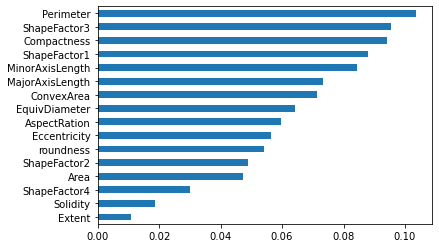

In [40]:
feat_imp.tail(20).plot(kind='barh')

### Permutation Importance

In [41]:
perm_imp = permutation_importance(model_rf, X_val, y_val, n_jobs=-2, random_state=42)

In [42]:

data = {'imp_mean': perm_imp['importances_mean'],
        'imp_std': perm_imp['importances_std']}

importances = pd.DataFrame(data, index=X_val.columns).sort_values(by='imp_mean')

importances.head(16)

,imp_mean,imp_std
MinorAxisLength,-0.003918,0.001485
Eccentricity,-0.002547,0.000843
MajorAxisLength,-0.002057,0.001134
AspectRation,-0.002057,0.001292
ConvexArea,-0.001763,0.001099
Compactness,-0.001665,0.000392
ShapeFactor2,-0.001469,0.001779
Area,-0.001273,0.000908
ShapeFactor1,-0.000588,0.001651
ShapeFactor3,-0.000490,0.002212


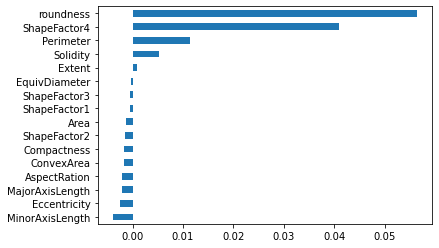

In [43]:
importances['imp_mean'].tail(17).plot(kind='barh')
plt.show()

## Precision, Recall, F1

In [44]:
print(classification_report(y_val, model_rf.predict(X_val)))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       180
      BOMBAY       1.00      1.00      1.00        81
        CALI       0.94      0.95      0.95       266
    DERMASON       0.92      0.94      0.93       572
       HOROZ       0.95      0.96      0.96       280
       SEKER       0.95      0.95      0.95       276
        SIRA       0.87      0.86      0.86       387

    accuracy                           0.93      2042
   macro avg       0.94      0.94      0.94      2042
weighted avg       0.93      0.93      0.93      2042



## confusion matrix

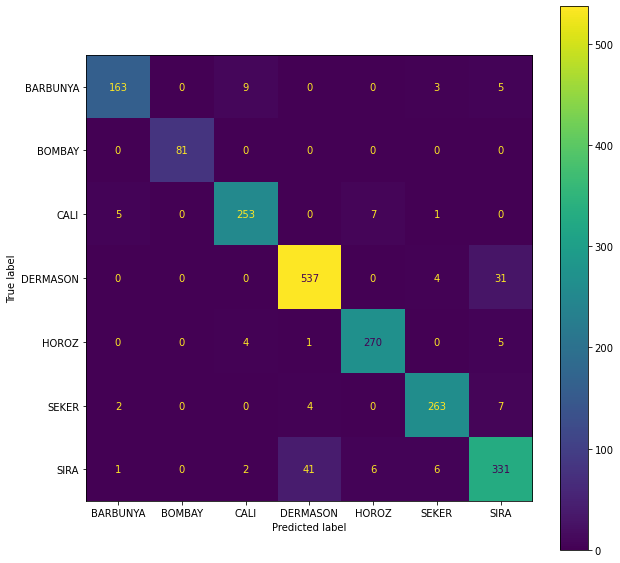

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model_rf,
                      X_val,
                      y_val,
                      values_format = '.0f',
                      ax=ax)
plt.show()

# XGBoost

In [46]:
model_XGB = make_pipeline(OrdinalEncoder(),
                          SimpleImputer(strategy='mean'),
                          XGBClassifier()
                         )

model_XGB.fit(X_train, y_train);

C:\Users\mosae\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
print('xgboost train accuracy', model_XGB.score(X_train, y_train))
print('xgboost test accuracy', model_XGB.score(X_val, y_val))

xgboost train accuracy 1.0
xgboost test accuracy 0.9392752203721841


## Cross-valadaiton

In [48]:
cv_score_model_rf = cross_val_score(model_XGB,
                                   X,
                                   y,
                                   cv=5,
                                    verbose=2,
                                   n_jobs=-2)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   5 | elapsed:   21.7s remaining:   32.6s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:   22.0s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:   22.0s finished


In [49]:
print(f'the Decision Trees model accuracy mean score is {round(cv_score_model_rf.mean()*100,2)}%')

the Decision Trees model accuracy mean score is 92.74%


### Permutation Importance

In [50]:
perm_imp = permutation_importance(model_XGB, X_val, y_val, n_jobs=-2, random_state=42)

In [51]:

data = {'imp_mean': perm_imp['importances_mean'],
        'imp_std': perm_imp['importances_std']}

importances = pd.DataFrame(data, index=X_val.columns).sort_values(by='imp_mean')

importances.head(16)

,imp_mean,imp_std
Eccentricity,0.000000,0.000000
EquivDiameter,0.000000,0.000000
ShapeFactor3,0.000000,0.000000
Extent,0.006954,0.002221
ShapeFactor2,0.007052,0.001262
AspectRation,0.007248,0.001708
MajorAxisLength,0.009892,0.003180
Perimeter,0.018707,0.004417
Solidity,0.019491,0.003119
Area,0.025367,0.001869


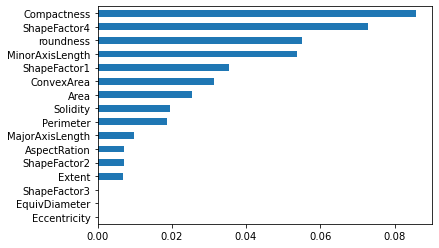

In [52]:
importances['imp_mean'].tail(17).plot(kind='barh')
plt.show()

## Precision, Recall, F1

In [53]:
print(classification_report(y_val, model_XGB.predict(X_val)))

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.93      0.95       180
      BOMBAY       1.00      1.00      1.00        81
        CALI       0.96      0.96      0.96       266
    DERMASON       0.92      0.95      0.94       572
       HOROZ       0.96      0.96      0.96       280
       SEKER       0.97      0.96      0.96       276
        SIRA       0.89      0.86      0.88       387

    accuracy                           0.94      2042
   macro avg       0.95      0.95      0.95      2042
weighted avg       0.94      0.94      0.94      2042



## confusion matrix

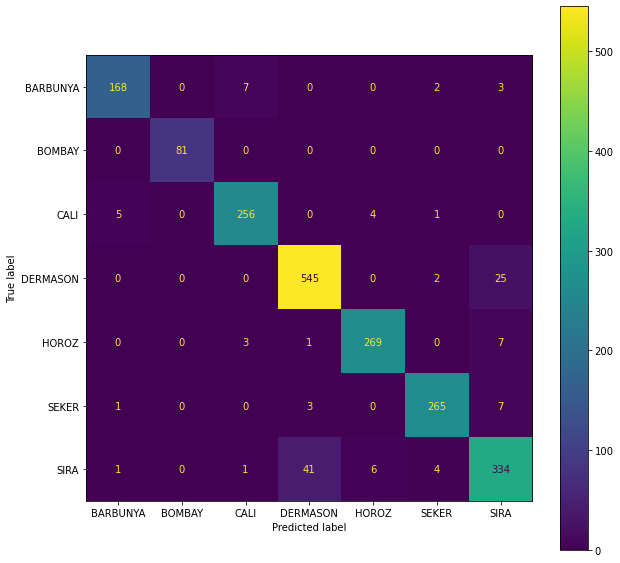

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model_XGB,
                      X_val,
                      y_val,
                      values_format = '.0f',
                      ax=ax)
plt.show()